# 1.unzip dataset

In [ ]:
!unzip '/content/Flowers-Dataset.zip'

# Importing necessary Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPool2D,Reshape,InputLayer
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 2.Image Augmentation

In [ ]:
path = 'flowers/'

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             validation_split = 0.30)
test_data_gen = ImageDataGenerator(rescale = 1./255,validation_split = 0.30)

In [ ]:
training_set = train_data_gen.flow_from_directory(path,
                                                 target_size=(64,64),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'training')

testing_set = test_data_gen.flow_from_directory(path,
                                                 target_size=(64,64),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'validation')

Found 3024 images belonging to 5 classes.
Found 1293 images belonging to 5 classes.


# 3.Create Model


In [ ]:
model = Sequential()

NameError: ignored

# 4.Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [ ]:
#convolution and Pooling layer 1
model.add(Conv2D(filters=48,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

#convolution and Pooling layer 2
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

#Flattening the images
model.add(Flatten())

#Fully Connected layers
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

NameError: ignored

In [ ]:
model.summary()

NameError: ignored

# 5.Compile The Model


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: ignored

# 6.Fit The Model

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5,verbose=1,mode='auto')

lr = ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=0.2,patience=5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

# Training the Model

In [ ]:
result = model.fit(x=training_set, validation_data=testing_set, epochs=50)

NameError: ignored

# Loss and Accuracy check using plot

In [ ]:
#plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

NameError: ignored

# 7.Save the Model

In [ ]:
model.save('flower.h5')

NameError: ignored

# 8.Test The Model

In [ ]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
classes = ['Daisy','Dandelion','Rose','Sunflower','Tulip'] 
def testing(img):
    img = image.load_img(img,target_size=(64,64)) 
    x = image.img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    pred = np.argmax(model.predict(x)) 
    return print("Predicted class as:",classes[pred])

def img_show(img):
    img1 = image.load_img(img,target_size=(64,64)) 
    plt.imshow(img1)

In [ ]:
#test1
img_show('/content/flowers/daisy/25360380_1a881a5648.jpg')
testing('/content/flowers/daisy/25360380_1a881a5648.jpg')

NameError: ignored

Predicted class as: Daisy


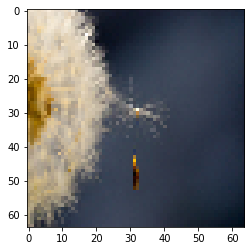

In [ ]:
#test2
img_show('/content/flowers/dandelion/461632542_0387557eff.jpg')
testing('/content/flowers/dandelion/461632542_0387557eff.jpg')

Predicted class as: Rose


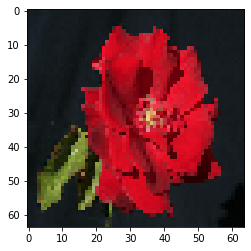

In [ ]:
#test3
img_show('/content/flowers/rose/3753920123_c7ebc18ee3.jpg')
testing('/content/flowers/rose/3753920123_c7ebc18ee3.jpg')

Predicted class as: Sunflower


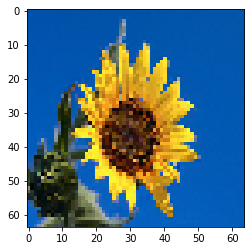

In [ ]:
#test4
img_show('/content/flowers/sunflower/164670455_29d8e02bbd_n.jpg')
testing('/content/flowers/sunflower/164670455_29d8e02bbd_n.jpg')

Predicted class as: Tulip


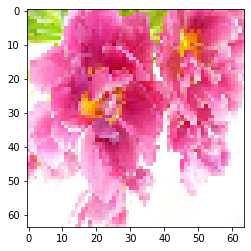

In [ ]:
#test5
img_show('/content/flowers/tulip/3238068295_b2a7b17f48_n.jpg')
testing('/content/flowers/tulip/3238068295_b2a7b17f48_n.jpg')